In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x, test_x = train_x/255.0, test_x/255.0

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape = (28, 28)),
#     tf.keras.layers.Dense(units = 256, activation = 'tanh'),
#     tf.keras.layers.Dense(units = 256, activation = 'tanh'),
#     tf.keras.layers.Dense(units = 10, activation = 'softmax')
# ])
# model.compile(optimizer = 'adam',
#               loss = 'sparse_categorical_crossentropy',
#               metrics = ['accuracy'])
# loss = model.fit(train_x, train_y, epochs = 5)
# test_loss, test_acc = model.evaluate(test_x, test_y)

In [4]:
brench = 100

inputs1 = tf.keras.layers.Input(shape = (28,28))

activation1 = 'relu'

# kernel_init = "glorot_uniform"
kernel_init = "he_normal"

x = tf.keras.layers.Flatten(input_shape = (28, 28))(inputs1)

for i in range(100):
  x = tf.keras.layers.Dense(50 ,activation= activation1, kernel_initializer=kernel_init)(x)


x = tf.keras.layers.Dense(10 ,activation= 'softmax', kernel_initializer=kernel_init)(x)

outputs = x
 
model = tf.keras.Model(inputs1, outputs)

In [5]:
lr = 0.0002

loss_object = tf.keras.losses.sparse_categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

In [ ]:
train_loss_record = []

pi = np.pi
step = 0
grad = 1.

for itr in range(8000):
  with tf.GradientTape() as tape:

    predictions = model(train_x)
    loss = loss_object(train_y, predictions)
    train_loss_record.append(tf.reduce_mean(loss))

    grad_w = tape.gradient(loss, model.trainable_variables)
  
    for n in range(101):
      grad_w[2*n] = grad_w[2*n] * (0.7 + 0.3 * np.cos(2*pi*(n + step) / 100))
      grad_w[2*n+1] = grad_w[2*n+1] * (0.7 + 0.3 * np.cos(2*pi*(n + step) / 100))
    
    optimizer.apply_gradients(zip(grad_w, model.trainable_variables))
  if step == 100:
    step = 0
  
  if itr % 10== 0:
      test_pred = model(test_x)
      test_loss = loss_object(test_y, test_pred)
      
      print(f"{itr} loss : {tf.reduce_mean(loss).numpy():.3e},  {tf.reduce_mean(test_loss).numpy():.3e}")

0 loss : 2.303e+00,  2.301e+00
10 loss : 2.235e+00,  2.214e+00


In [ ]:
train_loss_record = []

pi = np.pi
step = 0
grad = 1.

for itr in range(8000):
  with tf.GradientTape() as tape:

    predictions = model(train_x)
    loss = loss_object(train_y, predictions)
    train_loss_record.append(tf.reduce_mean(loss))

    if step < 50:
      step = step + 1
      
    elif step >= 50 and step < 150:
      step = step + 1
      grad = np.cos(pi*((step-50)/100))

    elif step >= 150 and step < 200:
      step = step + 1

    elif step >= 200 and step < 300:
      step = step + 1
      grad = np.cos(pi + pi*((step-200)/100))

    elif step == 300:
      step = 0

    grad_w = tape.gradient(loss, model.trainable_variables)
  
    for n in range(101):
      grad_w[2*n] = grad_w[2*n] * (0.65 + 0.007 * grad * (n-50) )
      grad_w[2*n+1] = grad_w[2*n+1] * (0.65 + 0.007 * grad * (n-50) )
    
    optimizer.apply_gradients(zip(grad_w, model.trainable_variables))

  if itr % 10== 0:
      test_pred = model(test_x)
      test_loss = loss_object(test_y, test_pred)
      
      print(f"{itr} loss : {tf.reduce_mean(loss).numpy():.3e},  {tf.reduce_mean(test_loss).numpy():.3e}")

0 loss : 2.354e+00,  2.315e+00
10 loss : 2.301e+00,  2.300e+00
20 loss : 2.266e+00,  2.251e+00
30 loss : 2.112e+00,  2.098e+00
40 loss : 2.026e+00,  2.017e+00


1214 loss : 3.877e-01,  7.239e-01


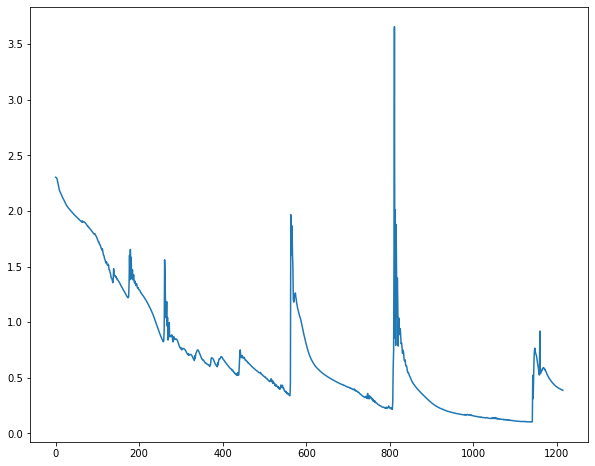

In [70]:
print(f"{itr} loss : {tf.reduce_mean(loss).numpy():.3e},  {tf.reduce_mean(test_loss).numpy():.3e}")

plt.figure(figsize = (10,8))
plt.plot(train_loss_record)
plt.show()

In [71]:
model.compile(optimizer = optimizer,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
test_loss, test_acc = model.evaluate(test_x, test_y, batch_size=len(test_x))

1/1 [==============================] - 2s 2s/step - loss: 0.7245 - accuracy: 0.8370


In [ ]:
model.compile(optimizer = optimizer,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])